# NumPy 的 narray: 一种多维数组对象

In [159]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[0.9526, -0.246, -0.8856], [0.5639, 0.2379, 0.9104]])

data

array([[ 0.9526, -0.246 , -0.8856],
       [ 0.5639,  0.2379,  0.9104]])

你可以利用这种数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样。

In [160]:
data * 10

array([[ 9.526, -2.46 , -8.856],
       [ 5.639,  2.379,  9.104]])

In [161]:
data + data

array([[ 1.9052, -0.492 , -1.7712],
       [ 1.1278,  0.4758,  1.8208]])

ndarray 是一种通用的同构数据多维容器，每个数组都有 shape (一个表示维度的元组)和一个 dtype (一个用于表示数组元素类型的对象)。

In [162]:
data.shape

(2, 3)

In [163]:
data.dtype

dtype('float64')

## 创建 ndarray

In [164]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [165]:
# 二维数组内的维度都必须一样，否则 np.array 将会报错
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [166]:
# 返回数组的维度
arr2.ndim

2

In [167]:
arr2.shape

(2, 4)

除非显式声明，否则 np.array 会尝试为给定的数组创建出一个合适的数据类型。

In [168]:
(arr1.dtype, arr2.dtype)

(dtype('float64'), dtype('int64'))

In [169]:
np.zeros(10), np.zeros((3, 6)), np.empty((2, 3, 2))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[[0., 0.],
         [1., 0.],
         [1., 1.]],
 
        [[0., 1.],
         [0., 0.],
         [0., 0.]]]))

In [170]:
# arange 可以生成一个序列数组
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [171]:
# 创建一个正方形单位矩阵
np.eye(4), np.identity(4)

(array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

## ndarray 的数据类型

In [172]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

arr1.dtype, arr2.dtype

(dtype('float64'), dtype('int32'))

In [173]:
# 可以通过 ndarray 的 astype 方法显式地转换其 dtype
arr = np.array([1, 2, 3, 4, 5])
float_arr = arr.astype(np.float64)
arr.dtype, float_arr.dtype

(dtype('int64'), dtype('float64'))

In [174]:
# 也可以将浮点转换为整形，但是小数点后数值将被截断
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [175]:
# 元素全是字符串，也可以通过 astype 转换
arr = np.array(['1.2', '2.2', '4.3'])

arr.astype(float)

array([1.2, 2.2, 4.3])

<span color='red'>astype 无论如何都会创建一个新的数组。</span>

## 数组和标量之间的运算

不像矩阵运算, 可以直接进行不同维度的计算，通过广播机制（后序会讲到）。

In [176]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
# 不像矩阵运算, 可以直接点对点乘
arr, arr * arr, arr - arr, 1 / arr, arr ** 0.5

(array([[1., 2., 3.],
        [4., 5., 6.]]),
 array([[ 1.,  4.,  9.],
        [16., 25., 36.]]),
 array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[1.        , 0.5       , 0.33333333],
        [0.25      , 0.2       , 0.16666667]]),
 array([[1.        , 1.41421356, 1.73205081],
        [2.        , 2.23606798, 2.44948974]]))

## 基本的索引和切片

In [177]:
arr = np.arange(10)

arr[5]

5

In [178]:
arr[5:8]

array([5, 6, 7])

In [179]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

标量通过赋值给一个切片时，会通过广播机制自动传播到整个切片选区。
切片是原数组的一个视图，视图上的任何修改都会更新到原数组里。
可以通过调用 ndarray.copy() 进行复制操作。

In [180]:
arr_slice = arr[5:8]
arr_slice[1] = 55
arr

array([ 0,  1,  2,  3,  4,  5, 55,  7,  8,  9])

In [181]:
arr_slice[:] = 88
arr

array([ 0,  1,  2,  3,  4, 88, 88, 88,  8,  9])

## 切片索引
ndarray 可以在多个维度上进行切片。

In [182]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [183]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [184]:
## 布尔型索引

In [185]:
from numpy.random import randn

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)

data

array([[ 3.93933692e-01,  1.11752934e-02,  2.73491449e-01,
        -2.28165811e+00],
       [ 2.66135106e-03,  4.82115758e-01,  2.45196676e-01,
        -3.17158893e+00],
       [-9.39742475e-01, -2.83821476e-01,  2.41852725e-01,
        -1.67502571e+00],
       [-3.45532673e-01, -1.00501968e+00, -1.22775518e+00,
        -7.24467429e-01],
       [ 4.80072716e-01,  1.19075263e+00, -9.23341373e-01,
         2.04784027e+00],
       [-4.48159684e-01, -2.94495537e-01,  2.96053332e-01,
        -5.86362105e-01],
       [ 1.95181100e+00,  3.19795551e-01,  4.20531840e-01,
        -1.25356084e+00]])

In [186]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

上述的布尔数组可以作为索引使用，布尔数组的维度必须和索引轴的长度一致。
即：获取上述布尔数组为 True 的轴，获取其内的数据切片。
该切片也是一个视图，可以通过广播对整个切片赋值，可以直接修改到原数组中。

In [187]:
data[names == 'Bob']

array([[ 0.39393369,  0.01117529,  0.27349145, -2.28165811],
       [-0.34553267, -1.00501968, -1.22775518, -0.72446743]])

In [188]:
data[names == 'Bob'] = 20
data

array([[ 2.00000000e+01,  2.00000000e+01,  2.00000000e+01,
         2.00000000e+01],
       [ 2.66135106e-03,  4.82115758e-01,  2.45196676e-01,
        -3.17158893e+00],
       [-9.39742475e-01, -2.83821476e-01,  2.41852725e-01,
        -1.67502571e+00],
       [ 2.00000000e+01,  2.00000000e+01,  2.00000000e+01,
         2.00000000e+01],
       [ 4.80072716e-01,  1.19075263e+00, -9.23341373e-01,
         2.04784027e+00],
       [-4.48159684e-01, -2.94495537e-01,  2.96053332e-01,
        -5.86362105e-01],
       [ 1.95181100e+00,  3.19795551e-01,  4.20531840e-01,
        -1.25356084e+00]])

布尔数组可以作为多维切片的参数。

In [189]:
data[names == 'Bob', :3]

array([[20., 20., 20.],
       [20., 20., 20.]])

布尔索引可以通过布尔运算将多个索引结合起来，例如: 非! 与& 或| (⚠️: or 和 and 关键字是无效的)。

In [190]:
data[names != 'Bob']

array([[ 2.66135106e-03,  4.82115758e-01,  2.45196676e-01,
        -3.17158893e+00],
       [-9.39742475e-01, -2.83821476e-01,  2.41852725e-01,
        -1.67502571e+00],
       [ 4.80072716e-01,  1.19075263e+00, -9.23341373e-01,
         2.04784027e+00],
       [-4.48159684e-01, -2.94495537e-01,  2.96053332e-01,
        -5.86362105e-01],
       [ 1.95181100e+00,  3.19795551e-01,  4.20531840e-01,
        -1.25356084e+00]])

In [191]:
data[(names == 'Bob') | (names == 'Joe')]

array([[ 2.00000000e+01,  2.00000000e+01,  2.00000000e+01,
         2.00000000e+01],
       [ 2.66135106e-03,  4.82115758e-01,  2.45196676e-01,
        -3.17158893e+00],
       [ 2.00000000e+01,  2.00000000e+01,  2.00000000e+01,
         2.00000000e+01],
       [-4.48159684e-01, -2.94495537e-01,  2.96053332e-01,
        -5.86362105e-01],
       [ 1.95181100e+00,  3.19795551e-01,  4.20531840e-01,
        -1.25356084e+00]])

## 花式索引 (Fancy indexing)
花式索引可以通过整形数组进行索引，⚠️：花式索引总是会拷贝到新的数组中。

In [192]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [193]:
# 给定的数组索引，将会按顺序被取出作为视图
arr[[4, 3, 0, -1]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [7., 7., 7., 7.]])

花式索引同样可以使用到多维切片中，但是选择的数据可能不一定符合你的预期。
如下：选取的是 （1，2), (3, 0), (5, 3), (7, 1) 这几个元素。

In [194]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [195]:
arr[[1, 3, 5, 7], [2, 0, 3, 1]]

array([ 6, 12, 23, 29])

下面的方法可能符合你最初的预期。

In [196]:
# 二维度索引的 : 是必须的, 否则第一个索引取到的顺序数据将会丢失顺序。
ret1 = arr[[1, 5, 7, 2]][[0, 3, 1, 2]]
ret2 = arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

ret1, ret2

(array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [20, 21, 22, 23],
        [28, 29, 30, 31]]),
 array([[ 4,  7,  5,  6],
        [20, 23, 21, 22],
        [28, 31, 29, 30],
        [ 8, 11,  9, 10]]))

另一个方法是使用 np.ix_ 函数，他可以将两个整形数组转换为一个可以选区句型区域的索引器。

In [197]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## 数组的转置和轴对换
转置也是源数据的一个视图，不会进行任何数据的复制。

In [198]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [199]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

.T 属性在矩阵运算时会经常用到, 例如使用 np.dot 计算矩阵的内积。

In [200]:
arr = np.random.randn(6, 3)

np.dot(arr.T, arr)

array([[ 2.65869119,  0.15431691, -1.686852  ],
       [ 0.15431691,  1.07401105, -1.15168519],
       [-1.686852  , -1.15168519,  5.92022237]])

In [201]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [202]:
# 正常三维轴的顺序是 0、1、2 下面是将第 0、1 轴对调, 轴从最外层 [ 作为 0 轴开始。
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

简单的转置可以使用 .T, 他其实就是进行轴对换而已。ndarray 还有一个 swapaxes 方法，他需要接收一对轴编号。

In [203]:
arr.swapaxes(0, 1), arr.swapaxes(1, 2)

(array([[[ 0,  1,  2,  3],
         [ 8,  9, 10, 11]],
 
        [[ 4,  5,  6,  7],
         [12, 13, 14, 15]]]),
 array([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],
 
        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]))

# 通用函数：快速的元素级数组函数

> 一元 ufunc

|----|--------|
|函数|说明|
|`abs`、`fabs`|计算整数、浮点数、复数的绝对值。对于非复数值，可以使用更快的 fabs。|
|`sqrt`|平方根。|
|`square`|计算各元素的平方。|
|`exp`|指数 $e^x$ |
|`log`、`log10`、`log2`、`log1p`|ln, $log_{10}$, $log_2$, $log_2(1+x)$|
|`sign`|计算元素的符号, 1/0/-1|
|`ceil`|计算各元素的 `ceiling` 值，即上限。|
|`floor`|计算各元素的 `floor` 值，即下限。｜
|`rint`|四舍五入最近的整数。|
|`modf`|将小数分离整数和小数部分。|
|`isnan`|返回一个表示哪些值是 NaN 不是数字的布尔类型数组。|
|`isfinite`,`isinf`|返回一个表示哪些值是有穷的、无穷的布尔类型数组。|
|`cos`,`cosh`,`sin`,`sinh`,`tan`,`tanh`,`arccos`,`arccosh`,`arcsin`,`arcsinh`,`arctan`,`arctanh`|三角函数。|
|`logical_not`|计算各元素 not x 的真值，相当于 -arr|

In [204]:
arr = np.arange(16).reshape(4, 4) - 8
arr

array([[-8, -7, -6, -5],
       [-4, -3, -2, -1],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [205]:
np.abs(arr), np.fabs(arr)

(array([[8, 7, 6, 5],
        [4, 3, 2, 1],
        [0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[8., 7., 6., 5.],
        [4., 3., 2., 1.],
        [0., 1., 2., 3.],
        [4., 5., 6., 7.]]))

In [206]:
np.sqrt(np.abs(arr)), np.square(arr)

(array([[2.82842712, 2.64575131, 2.44948974, 2.23606798],
        [2.        , 1.73205081, 1.41421356, 1.        ],
        [0.        , 1.        , 1.41421356, 1.73205081],
        [2.        , 2.23606798, 2.44948974, 2.64575131]]),
 array([[64, 49, 36, 25],
        [16,  9,  4,  1],
        [ 0,  1,  4,  9],
        [16, 25, 36, 49]]))

In [207]:
abs_arr = np.array([np.e, np.e ** 2, 2, 4, 10, 100, np.e - 1])

np.exp(abs_arr), np.log(abs_arr), np.log10(abs_arr), np.log2(abs_arr), np.log1p(abs_arr)

(array([1.51542622e+01, 1.61817799e+03, 7.38905610e+00, 5.45981500e+01,
        2.20264658e+04, 2.68811714e+43, 5.57494152e+00]),
 array([1.        , 2.        , 0.69314718, 1.38629436, 2.30258509,
        4.60517019, 0.54132485]),
 array([0.43429448, 0.86858896, 0.30103   , 0.60205999, 1.        ,
        2.        , 0.2350944 ]),
 array([1.44269504, 2.88539008, 1.        , 2.        , 3.32192809,
        6.64385619, 0.78096668]),
 array([1.31326169, 2.12692801, 1.09861229, 1.60943791, 2.39789527,
        4.61512052, 1.        ]))

In [208]:
np.sign(arr)

array([[-1, -1, -1, -1],
       [-1, -1, -1, -1],
       [ 0,  1,  1,  1],
       [ 1,  1,  1,  1]])

In [209]:
arr = np.random.randn(4)

arr, np.ceil(arr), np.floor(arr), np.rint(arr), np.modf(arr)

(array([ 0.9037445 ,  0.54546647,  0.7536844 , -0.26387324]),
 array([ 1.,  1.,  1., -0.]),
 array([ 0.,  0.,  0., -1.]),
 array([ 1.,  1.,  1., -0.]),
 (array([ 0.9037445 ,  0.54546647,  0.7536844 , -0.26387324]),
  array([ 0.,  0.,  0., -0.])))


> 二元 ufunc

|----|--------|
|函数|说明|
|`add`｜将数组中对应的元素相加|
|`subtract`|将第一个数组中减去第二个数组中的元素|
|`multiply`|数组元素相乘|
|`divide`, `floor_divide`|除法或向下圆整除法(丢弃余数)|
|`power`|对第一个数组中的元素A, 根据第二个数组 B 中的相应元素算A ^ B|
|`maximum`, `fmax`|元素级的最大值计算。fmax 将忽略 NaN |
|`minimum`, `fmin`|元素级的最小值计算。fmin 将忽略 NaN |
|`mod`|元素级的求模计算|
|`copysign`|将第二个数组中的值的符号复制给第一个数值中的值 |
|`greater`, `greater_equal`, `less`, `less_equal`, `equal`, `not_equal`| 执行元素级的比较运算，最终产生布尔型数组。相当于中缀运算符 >, >=, <, <=, ==, != |
|`logical_and`,`logical_or`,`logical_xor`|执行元素级的真值逻辑运算。相当于中缀运算符 &, |, ^ |

# 利用数组进行数据处理

np.meshgrid 函数接收两个一位数组，并产生两个二位矩阵（表示两个一位数组对应所有的(x, y) 对）。

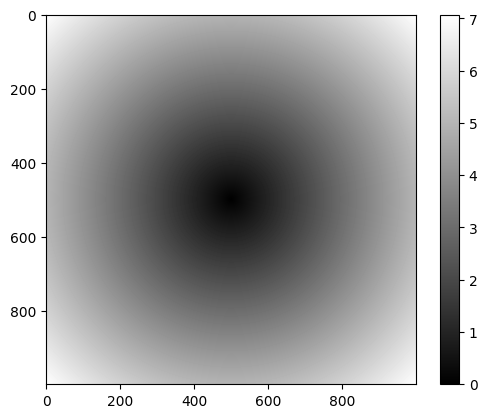

In [210]:
points = np.arange(-5, 5, 0.01)

xs, ys = np.meshgrid(points, points)

z = np.sqrt(xs ** 2 + ys ** 2)

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()

## 将条件逻辑表述为数组运算
numpy.where 是三元表达式 x if condition else y 的矢量化版本。
numpy.where 第 2，3 个参数可以不是数组，可以是标量，将会通过广播进行标量赋值。

## 数学和统计方法
sum, mean, std(标准差), var(方差), min, max, argmin(最小值索引), argmax(最大值索引), cumsum, cumprod

In [211]:
arr = np.arange(16).reshape(4, 4)

arr.mean(), arr.sum()

(7.5, 120)

In [212]:
# mean, sum 可以接受一个参数，表示要聚合的轴
arr.mean(0), arr.sum(1)

(array([6., 7., 8., 9.]), array([ 6, 22, 38, 54]))

In [213]:
arr.cumsum(), arr.cumprod()

(array([  0,   1,   3,   6,  10,  15,  21,  28,  36,  45,  55,  66,  78,
         91, 105, 120]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [214]:
# cumsum、cumprod也可以指定一个轴，向一个方向生成一个中间结果的数组。
arr.cumsum(0), arr.cumprod(0)

(array([[ 0,  1,  2,  3],
        [ 4,  6,  8, 10],
        [12, 15, 18, 21],
        [24, 28, 32, 36]]),
 array([[   0,    1,    2,    3],
        [   0,    5,   12,   21],
        [   0,   45,  120,  231],
        [   0,  585, 1680, 3465]]))

## 用于布尔型数组的方法

布尔值会被强制转换为 1(True) 和 0(False)。因此 sum 经常被用来对布尔类型数组的 True 值计数。

In [215]:
arr = randn(100)

(arr > 0).sum()

53

In [216]:
bools = np.array([False, False, True, False])

# any 是判断数组中任何一个为 True, all 是判断数组中所有元素为 True
bools.any(), bools.all()

(True, False)

## 排序

numpy 数组也可以通过 sort 方法就地排序。

In [217]:
arr = randn(8)

arr

array([ 0.6941409 ,  0.22974288, -1.25375032,  0.14485753,  0.8307874 ,
        0.39123123,  0.59628902, -1.33081962])

In [218]:
arr.sort()

arr

array([-1.33081962, -1.25375032,  0.14485753,  0.22974288,  0.39123123,
        0.59628902,  0.6941409 ,  0.8307874 ])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给 sort 即可。 沿该轴方向，而不是排序该轴。

In [219]:
arr = randn(5, 3)
arr

array([[ 1.06758681,  1.94501816, -1.5945284 ],
       [ 1.3434084 ,  0.50981393,  0.22673283],
       [-2.07829092, -0.82522221, -0.07027903],
       [ 0.48883537, -1.5006741 , -1.35003308],
       [-0.93421102, -0.21100707,  1.01179991]])

In [220]:
arr.sort(0)
arr

array([[-2.07829092, -1.5006741 , -1.5945284 ],
       [-0.93421102, -0.82522221, -1.35003308],
       [ 0.48883537, -0.21100707, -0.07027903],
       [ 1.06758681,  0.50981393,  0.22673283],
       [ 1.3434084 ,  1.94501816,  1.01179991]])

## 唯一化以及其他的集合逻辑

* np.unique 会去重数组并返回一排序的结果。
* np.in1d 用于测试一个数组中的值在另一个数组中的成员资格，返回一个 bool 数组。

In [221]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [222]:
np.in1d(np.arange(6), [2, 3, 5])

array([False, False,  True,  True, False,  True])

*数组的集合运算*

* intersect1d(x, y): 计算 x, y 中的公共元素, 并返回有序结果
* union1d(x, y): 计算 x, y 的并集
* setdiff1d(x, y): 集合的差, 即元素在 x 中且不存在 y 中的元素
* setxor1d(x, y): 集合的对称差, 即 不同时存在 x, y 中的元素

# 用于数组的文件输入输出

## 将数组以二进制格式保存到磁盘

np.save 和 np.load 可以来读写磁盘数组数据, 以未压缩的原始二进制格式保存在扩展名为 npy 的文件中。

In [223]:
arr = np.arange(100)

np.save("./temp", arr)

In [224]:
arr = np.load("./temp.npy")

arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## 存取文本文件

In [225]:
np.savetxt("temp.txt", np.arange(16).reshape(4, 4), delimiter=",")

In [226]:
np.loadtxt("temp.txt", delimiter=",").astype(int)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

# 线性代数

In [227]:
arr = np.arange(4).reshape(2, 2)

# 返回方阵的对角线元素，或者将 1维数组转换为方阵其余元素都为0.
np.diag(arr), np.diag(np.array([1, 2, 3, 4]))

(array([0, 3]),
 array([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]]))

In [228]:
# 点积
np.dot(arr, arr)

array([[ 2,  3],
       [ 6, 11]])

In [229]:
# 对角线元素的和
np.trace(arr)

3

In [230]:
# 行列式的值
np.linalg.det(arr)

-2.0

In [231]:
# 本征值和本征向量, 特征值和特征向量
np.linalg.eig(arr)

(array([-0.56155281,  3.56155281]),
 array([[-0.87192821, -0.27032301],
        [ 0.48963374, -0.96276969]]))

In [232]:
# 方阵的逆
np.linalg.inv(arr)

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [233]:
# 矩阵的 Moore-Penrose 伪逆
np.linalg.pinv(arr)

array([[-1.50000000e+00,  5.00000000e-01],
       [ 1.00000000e+00,  4.21097322e-17]])

In [234]:
# QR 分解
np.linalg.qr(arr)

(array([[ 0., -1.],
        [-1.,  0.]]),
 array([[-2., -3.],
        [ 0., -1.]]))

In [235]:
# SVD 分解, 奇异值分解
np.linalg.svd(arr)

(array([[-0.22975292, -0.97324899],
        [-0.97324899,  0.22975292]]),
 array([3.70245917, 0.54018151]),
 array([[-0.52573111, -0.85065081],
        [ 0.85065081, -0.52573111]]))

In [236]:
# Ax = b 的解
np.linalg.solve(arr, [1, 3])

array([0., 1.])

In [237]:
# Ax = b 的最小二乘解
np.linalg.lstsq(arr, [1, 3], rcond=None)

(array([3.44207776e-17, 1.00000000e+00]),
 array([], dtype=float64),
 2,
 array([3.70245917, 0.54018151]))

# 随机数的生成

numpy.random 包里的函数

In [238]:
import numpy.random as npr

# 确定随机数生成器的种子
npr.seed(99)

In [239]:
# 返回一个序列的随机排列
npr.permutation(10)

array([8, 5, 4, 2, 6, 7, 0, 9, 3, 1])

In [240]:
# 对一个序列就地随机排列
arr = np.array([1, 99, 2, 33])
npr.shuffle(arr)
arr

array([33,  2, 99,  1])

In [241]:
# 产生均匀分布的样本值

npr.rand(4, 2)

array([[0.2976225 , 0.04669572],
       [0.9906274 , 0.00682573],
       [0.76979303, 0.7467671 ],
       [0.37743894, 0.49414745]])

In [242]:
# 产生上下范围内的随机整数
npr.randint(1, 10, size=(3, 2))

array([[9, 5],
       [8, 6],
       [5, 2]])

In [243]:
# 产生标准正态分布的样本值
# npr.normal(0, 1, size=(4, 4)) 一样的效果
npr.randn(4, 4)

array([[-1.02694982,  0.98287615, -0.15798408,  0.74150626],
       [-0.53346074,  0.09899394, -1.48448745,  0.83376917],
       [ 0.0805954 , -0.82194336, -0.84877628, -0.37595761],
       [-0.87698275,  1.47465244, -0.98302221, -0.60549964]])

In [244]:
# 产生二项分布的样本值
npr.binomial(10, 0.2, size=(4, 2))

array([[4, 2],
       [2, 1],
       [4, 5],
       [1, 3]])

In [245]:
# 产生正态分布的样本值
npr.normal(10, 2, size=(4, 2))

array([[10.28341531,  8.95565796],
       [ 9.58028222, 10.56238269],
       [ 8.642957  ,  6.95501362],
       [10.06769239,  7.38196985]])

In [246]:
# 产生 Beta 分布的样本值
npr.beta(2, 5, size=(4, 4))

array([[0.1842415 , 0.2740288 , 0.26323656, 0.22661194],
       [0.40280601, 0.2764895 , 0.7922494 , 0.43211369],
       [0.43072492, 0.15694032, 0.30685063, 0.32730041],
       [0.16490009, 0.16147369, 0.48589343, 0.41519352]])

In [247]:
# 卡方分布
# df: degree of freedom 自由度
npr.chisquare(df=2, size=(2, 2))

array([[1.36486147, 0.92164911],
       [1.75582545, 0.72900706]])

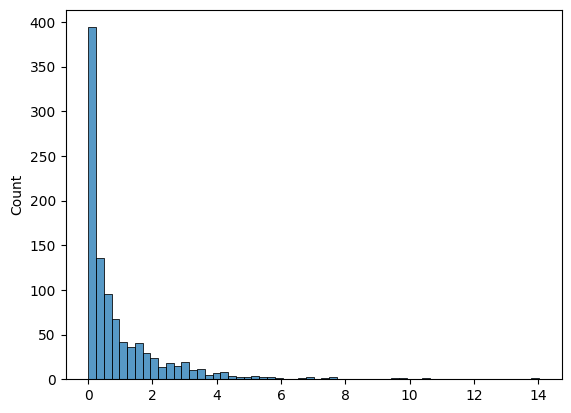

In [248]:
# 卡方分布可视化
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(random.chisquare(df=1, size=1000))
plt.show()

In [249]:
# gamma 分布
npr.gamma(4)

5.609634062379228

In [250]:
# 均匀分布
npr.uniform()

0.6804910036965087